In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

# RMSD: Backbone, NET, HIV Tat

In [3]:
flist=['/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/rmsfit.backbone.out',
          '/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/rmsfit.net.out',
          '/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/rmsfit.tat.out']

In [4]:
rmsd=[]
for file in flist:
    data=np.loadtxt(file,comments='#',usecols=1)
    rmsd.append(data)

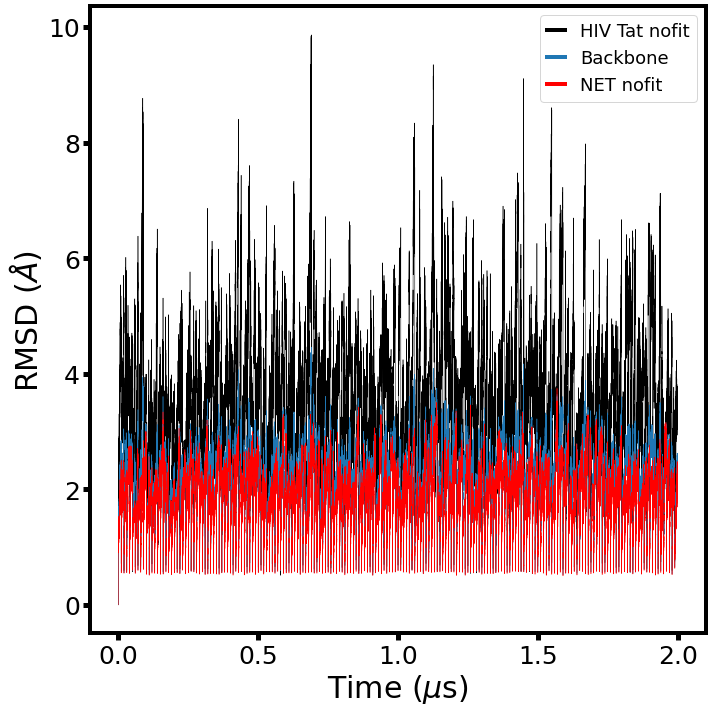

In [5]:
x = np.arange(len(rmsd[0]))/100000
plt.plot(x,rmsd[2],label='HIV Tat nofit',linewidth =.5,color='k')
plt.plot(x,rmsd[0],label='Backbone',linewidth =.5,color='C0')
plt.plot(x,rmsd[1],label='NET nofit',linewidth =.5,color='red')
leg = plt.legend(fontsize=18,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

plt.ylabel("RMSD ($\AA$)", fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Time ($\mu$s)", fontsize=30)
plt.xticks(fontsize=30)
plt.tick_params(axis='both',labelsize='25', length=7, width=5)
plt.tight_layout()
#plt.savefig("../figs/rmsd3.png", transparent=True)

In [6]:
def calcStats (data):
    avg=np.average(data)
    std=np.std(data, dtype=np.float64)
    result = avg, u"\u00B1", std
    print('The average RMSD for the backbone is:', result)
    #return result
    minRMSD = data[data > .01].min(axis=0)
    maxRMSD = data.max()
    print("Range of RMSD is ", minRMSD, "-", maxRMSD)

In [7]:
calcStats(rmsd[0])

The average RMSD for the backbone is: (2.1768774405, '±', 0.587592428516841)
Range of RMSD is  0.516 - 4.4625


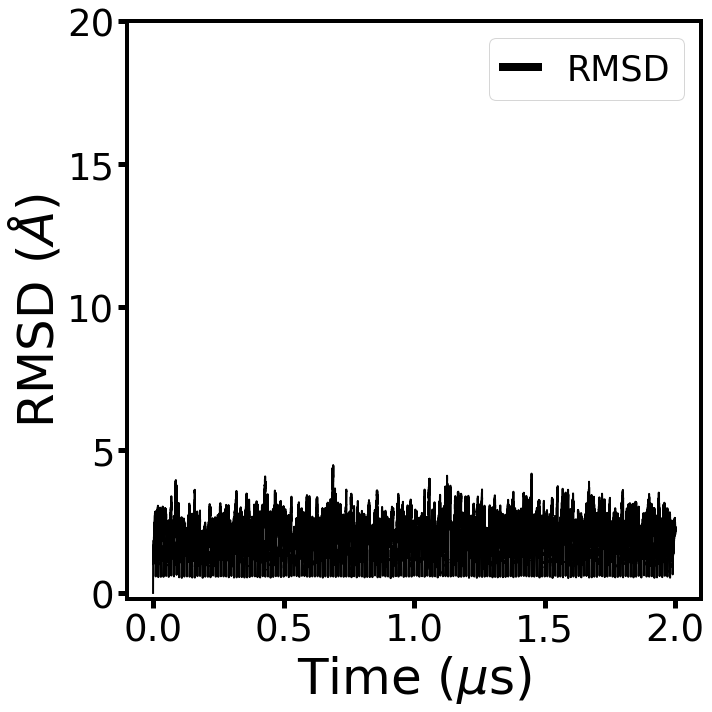

In [16]:
x = np.arange(len(rmsd[1]))/100000

plt.plot(x,rmsd[0],label='RMSD',linewidth=2,color='black')

leg = plt.legend(fontsize=35,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

plt.ylabel("RMSD ($\AA$)", fontsize=50)
plt.yticks((np.arange(0, 25, step=5)), fontsize=35)
plt.xlabel("Time ($\mu$s)", fontsize=50)
plt.xticks(fontsize=35)
plt.tick_params(axis='both', labelsize='37', length=9, width=5)
plt.tight_layout()
plt.savefig("../../figs/rmsd1.png", transparent=True)

In [9]:
def HBondCutoff (array, cutoffTemp):    
    allLen = len(array)
    cutoff=(cutoffTemp + .1)
    t = list(filter((cutoff).__ge__, rmsd[0]))
    lenVar = len(t)
    percent = (lenVar/allLen * 100)
    print("Percentage for a", cutoffTemp ,"\u212B cuttoff is: ", percent,"%")

In [10]:
HBondCutoff(rmsd[0], 2.0)
HBondCutoff(rmsd[0], 2.5)
HBondCutoff(rmsd[0], 3.0)

Percentage for a 2.0 Å cuttoff is:  42.4345 %
Percentage for a 2.5 Å cuttoff is:  76.046 %
Percentage for a 3.0 Å cuttoff is:  95.179 %


# TESTING

1000

In [51]:
count1=0
count2=1000
df1 = pd.DataFrame(columns=['RMSD'])
for x in range(1,201):
    rms=oldrmsd[2][count1:count2]
    i =(np.average(rms))
    df1=df1.append({'RMSD': i}, ignore_index=True)
    count1+=1000
    count2+=1000

In [52]:
df1[df1.RMSD < 4.2]

,RMSD
3,3.073401
26,3.433578
29,3.707935
36,3.433578
52,3.366988
56,3.433578
66,3.433578
110,3.786476
121,4.121808
131,3.703288


In [74]:
count1=0
count2=1000
df2 = pd.DataFrame(columns=['RMSD'])
for x in range(1,201):
    rms=newrmsd[2][count1:count2]
    i =(np.average(rms))
    df2=df2.append({'RMSD': i}, ignore_index=True)
    count1+=1000
    count2+=1000

In [79]:
df2[df2.RMSD < 4.0]

,RMSD
48,3.781066
69,3.891358
78,3.781066
88,3.781066
98,3.781066
108,3.781066
118,3.781066
128,3.781066
138,3.781066
148,3.781066


In [69]:
newrmsd[2][48001:49001]

array([1.2585, 1.2702, 1.1882, 1.2367, 1.4512, 1.6432, 1.6918, 1.6551,
       1.6352, 1.4915, 1.5612, 1.792 , 1.7191, 2.0808, 1.9772, 1.8057,
       1.8439, 1.9786, 1.8754, 2.0403, 2.1092, 2.1208, 2.351 , 2.2134,
       2.1435, 2.0496, 2.1858, 2.2201, 2.092 , 2.0886, 2.2124, 2.2948,
       2.3214, 2.7229, 2.9942, 2.7264, 2.9503, 3.0169, 2.8657, 2.7145,
       2.6574, 2.8049, 2.901 , 2.7927, 2.8161, 2.8942, 2.6715, 2.6387,
       2.7241, 2.589 , 2.5538, 2.5589, 2.5806, 2.5972, 2.5778, 2.4353,
       2.3495, 2.4953, 2.5007, 2.6276, 2.6084, 2.7404, 2.5921, 2.4445,
       2.3107, 2.4885, 2.25  , 2.3623, 2.2929, 2.2328, 2.3236, 2.294 ,
       2.2879, 2.2942, 2.2413, 2.4683, 2.5668, 2.8429, 2.895 , 2.7492,
       2.6609, 2.5734, 2.6283, 2.6558, 2.6861, 2.6675, 2.7899, 2.7168,
       2.9968, 2.8447, 2.9467, 3.1724, 3.168 , 3.0956, 2.9157, 2.9321,
       3.1159, 2.9783, 2.9749, 2.8222, 2.7179, 2.5324, 2.7532, 2.6014,
       2.6251, 2.6696, 2.6118, 2.603 , 2.8441, 2.648 , 2.8074, 2.9617,
      

In [70]:
newrmsd[2][69001:70001]

array([0.9569, 1.0624, 0.9978, 1.1066, 1.1803, 1.2284, 1.3284, 1.5224,
       1.4465, 1.447 , 1.5438, 1.4385, 1.6117, 1.6116, 1.6876, 1.5796,
       1.5989, 1.672 , 1.6621, 1.5508, 1.6169, 1.7064, 1.7784, 1.6434,
       1.5312, 1.5616, 1.6535, 1.649 , 1.6823, 1.5837, 1.5906, 1.661 ,
       1.6566, 1.8454, 1.8238, 1.8536, 1.8553, 1.7885, 1.7076, 1.8192,
       1.7555, 1.7805, 1.7485, 1.9053, 1.8989, 1.8256, 1.8635, 1.7184,
       1.7892, 1.7824, 1.7382, 1.9817, 2.0227, 1.983 , 2.006 , 1.9832,
       1.9593, 2.2638, 2.278 , 2.4855, 2.5085, 2.4263, 2.5519, 2.4768,
       2.595 , 2.3419, 2.294 , 2.5908, 2.6025, 2.7864, 2.7667, 2.8589,
       2.5453, 2.5948, 2.7155, 2.5823, 2.5141, 2.6503, 2.5766, 2.6043,
       2.5859, 2.6866, 2.4746, 2.5558, 2.5334, 2.5781, 2.4572, 2.3079,
       2.3213, 2.5506, 2.8659, 2.9093, 2.8433, 2.6679, 2.6331, 2.7502,
       2.9052, 3.1596, 2.7509, 2.8585, 2.9419, 2.7349, 2.3839, 2.3675,
       2.5408, 2.1951, 2.2728, 2.4015, 2.2209, 2.2911, 2.1873, 2.3151,
      

In [71]:
newrmsd[2][78001:79001]

array([1.2585, 1.2702, 1.1882, 1.2367, 1.4512, 1.6432, 1.6918, 1.6551,
       1.6352, 1.4915, 1.5612, 1.792 , 1.7191, 2.0808, 1.9772, 1.8057,
       1.8439, 1.9786, 1.8754, 2.0403, 2.1092, 2.1208, 2.351 , 2.2134,
       2.1435, 2.0496, 2.1858, 2.2201, 2.092 , 2.0886, 2.2124, 2.2948,
       2.3214, 2.7229, 2.9942, 2.7264, 2.9503, 3.0169, 2.8657, 2.7145,
       2.6574, 2.8049, 2.901 , 2.7927, 2.8161, 2.8942, 2.6715, 2.6387,
       2.7241, 2.589 , 2.5538, 2.5589, 2.5806, 2.5972, 2.5778, 2.4353,
       2.3495, 2.4953, 2.5007, 2.6276, 2.6084, 2.7404, 2.5921, 2.4445,
       2.3107, 2.4885, 2.25  , 2.3623, 2.2929, 2.2328, 2.3236, 2.294 ,
       2.2879, 2.2942, 2.2413, 2.4683, 2.5668, 2.8429, 2.895 , 2.7492,
       2.6609, 2.5734, 2.6283, 2.6558, 2.6861, 2.6675, 2.7899, 2.7168,
       2.9968, 2.8447, 2.9467, 3.1724, 3.168 , 3.0956, 2.9157, 2.9321,
       3.1159, 2.9783, 2.9749, 2.8222, 2.7179, 2.5324, 2.7532, 2.6014,
       2.6251, 2.6696, 2.6118, 2.603 , 2.8441, 2.648 , 2.8074, 2.9617,
      

In [72]:
newrmsd[2][47001:48001]

array([1.4851, 1.6738, 1.6357, 1.6393, 1.7933, 1.9003, 1.9639, 1.8641,
       1.987 , 1.957 , 1.8924, 1.6504, 1.4568, 1.3837, 1.3137, 1.5027,
       1.7786, 1.6456, 1.8229, 1.8414, 1.8037, 1.8922, 1.7709, 1.6964,
       1.5649, 1.7854, 1.6922, 1.5612, 1.6421, 1.636 , 1.8096, 1.8478,
       2.0579, 2.0373, 2.1803, 2.0208, 2.1214, 1.8544, 1.907 , 1.7973,
       2.0936, 2.1662, 2.2177, 2.1939, 2.0464, 2.1372, 2.1523, 2.0425,
       2.1681, 2.0777, 2.2231, 2.1981, 2.2442, 1.9994, 2.2213, 2.2564,
       2.1916, 2.2163, 2.406 , 2.2257, 2.1355, 2.3151, 2.4127, 2.4795,
       2.6815, 2.6021, 2.5739, 2.6048, 2.652 , 2.565 , 2.8523, 2.6385,
       2.6073, 2.63  , 2.7768, 2.8451, 3.0008, 2.9481, 2.8782, 2.8272,
       2.82  , 2.6869, 2.7975, 2.9683, 2.9964, 3.1024, 2.7325, 2.5618,
       2.6905, 2.8867, 2.9122, 3.1271, 3.1188, 3.3754, 3.4583, 3.2823,
       3.2388, 3.5547, 3.3806, 3.4764, 3.4373, 3.3664, 3.2096, 3.1887,
       3.2689, 3.3438, 3.277 , 3.0427, 2.8898, 3.0526, 3.0582, 3.2171,
      